<h1><center>What factors made people aboard the Titanic more likely to survive?</center></h1>

 Let's explore this question by first reading in our data from the csv file into a DataFrame object and get a look at the structure of our data sample.

In [20]:
import pandas as pd
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Checking for inaccuracies and missing values

First let's find the columns that contain only unique values, and also print the columns that have missing values. This will give us a better sense of where to look for inaccuracies in the data should any exist.

In [21]:
# Print the columns for which every position contains a unique value
for pos in range(len(titanic_df.columns)):
    if len(titanic_df.iloc[:, pos].unique()) == len(titanic_df):
        print(titanic_df.dtypes.index[pos])

PassengerId
Name


In [22]:
# Print columns with any missing values
for pos in range(len(titanic_df.columns)):
    if titanic_df.iloc[:, pos].isnull().any():
        print(titanic_df.dtypes.index[pos])

Age
Cabin
Embarked


All names are conveniently unique. There appear to be duplicate ticket numbers. Most likely multiple people were admitted on the same ticket. We can verify this by sorting a DataFrame of duplicate tickets.

In [23]:
tickets = titanic_df['Ticket']
titanic_df[tickets.isin(tickets[tickets.duplicated()])].sort_values('Ticket').head(n=20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C


## Survivors by class

Firstly let's find the overall survival rate and the number of passengers by class.

In [24]:
# Overall survival rate
rate = titanic_df['Survived'].sum() / len(titanic_df)
str(round(rate*100, 1)) + '%'

'38.4%'

In [25]:
# Passengers by class
passengers_per_class_gb = titanic_df[['Pclass','Survived']].groupby('Pclass', as_index=False)
passengers_per_class_gb.size()

Pclass
1    216
2    184
3    491
dtype: int64

Using the information from above, we can find and plot a graph of the number of survivors by class.

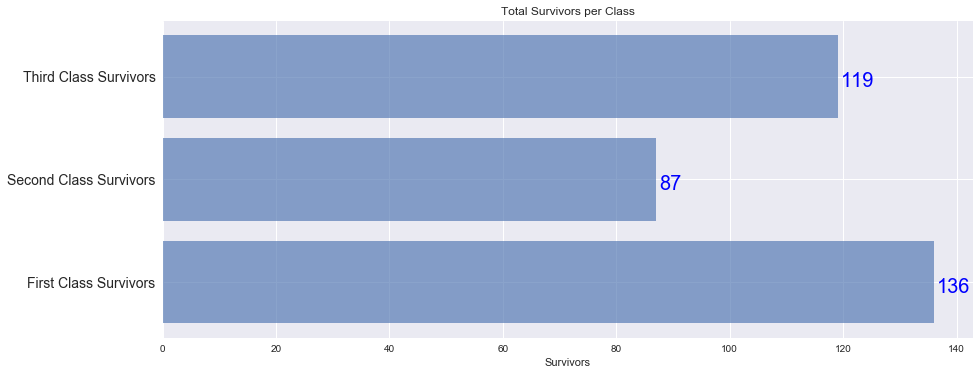

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

survivors_per_class_df = passengers_per_class_gb.sum()
classes_ls = ['First Class','Second Class','Third Class']
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(6,4))
plt.barh(survivors_per_class_df['Pclass'], survivors_per_class_df['Survived'],
         align='center', alpha=0.65)
plt.yticks(survivors_per_class_df['Pclass'], [p +' Survivors' for p in classes_ls], fontsize=14)
plt.xlabel('Survivors')
plt.title('Total Survivors per Class')
for y, x in enumerate(survivors_per_class_df['Survived']):
    plt.text(x + .5, y + .9, str(x), color='blue')
plt.subplots_adjust(right=2, top=1, bottom=-.1)

Now let's break down the survival rate by class.

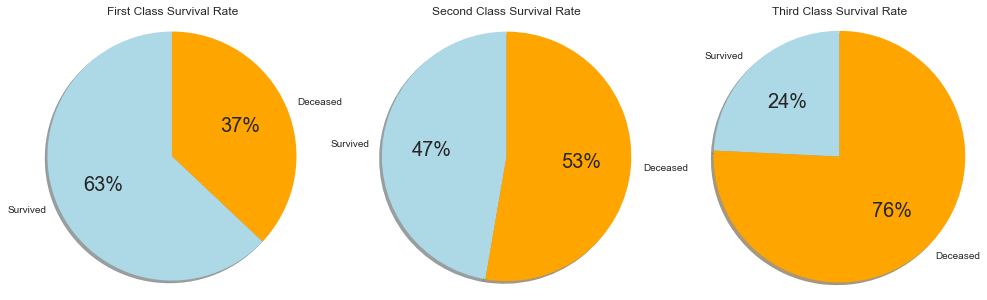

In [27]:
def get_survival_rate(categories):
    '''Helper function for groupby.apply'''
    return categories.sum() / len(categories)

survival_rate_per_class_sr = passengers_per_class_gb.apply(get_survival_rate)['Survived']

def draw_pie_charts(rate_sr, headers, labels=['Survived','Deceased'], colors=['lightblue','orange']):
    '''Takes a list of survival rates and and list of headers as inputs and draws pie chart
    visualizations displaying the information'''
    num_of_charts = len(rate_sr)
    charts = [None] * num_of_charts
    fig = plt.figure(figsize=(7,5))
    for i in range(num_of_charts):
        charts[i] = fig.add_subplot(1, num_of_charts, i+1)
        charts[i].pie([rate_sr[i], 1-rate_sr[i]], labels=labels, autopct='%1.0f%%', shadow=True,
                      startangle=90, colors=colors)
        charts[i].set_title(headers[i])
        charts[i].axis('equal')
    plt.subplots_adjust(right=2)

s = ' Survival Rate'
classes_ls = [p+s for p in classes_ls]
draw_pie_charts(survival_rate_per_class_sr, classes_ls)

As expected, the poor suffered the brunt of the casualties, with the majority of first class passengers surviving.

## Male and female survivors

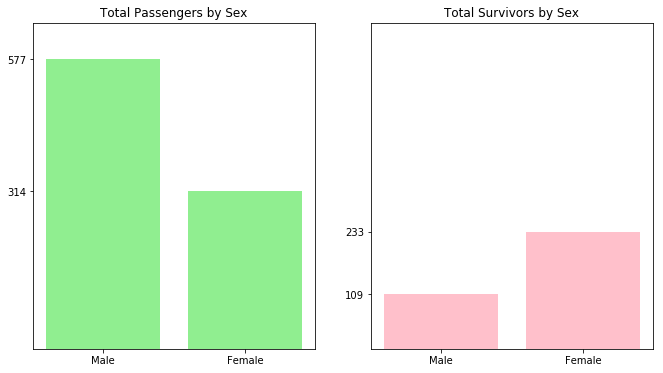

In [33]:
passengers_per_sex_gb = titanic_df[['Sex','Survived']].groupby('Sex')
passengers_per_sex_ls = list(passengers_per_sex_gb.size())
survivors_per_sex_ls = list(passengers_per_sex_gb.sum()['Survived'])

sns.reset_orig()
fig = plt.figure(figsize=(8,6))
charts = [None]*2
headers = ['Total Passengers by Sex', 'Total Survivors by Sex']
colors = ['lightgreen','pink']
bars = [passengers_per_sex_ls, survivors_per_sex_ls]
labels = ('Male','Female')

for i in range(2):
    charts[i] = fig.add_subplot(1,2,i+1)
    charts[i].bar([1,0], bars[i], color=colors[i])
    charts[i].set_yticks(bars[i])
    charts[i].set_xticks([0,1])
    charts[i].set_xticklabels(labels)
    charts[i].set(title=headers[i], ylim=[0,650])
    
plt.subplots_adjust(right=1.2)

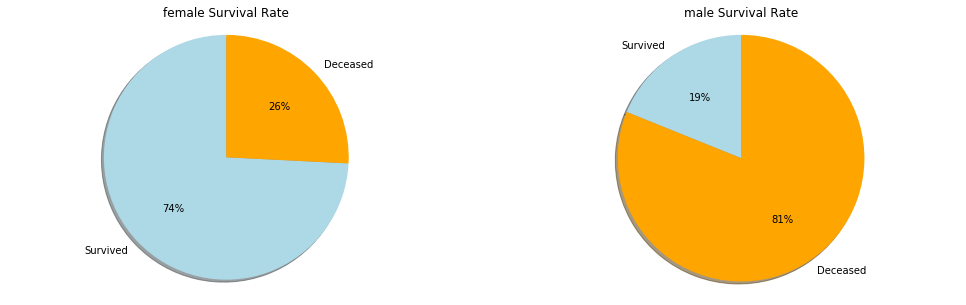

In [29]:
survival_rate_per_sex_sr = passengers_per_sex_gb.apply(get_survival_rate)['Survived']
draw_pie_charts(survival_rate_per_sex_sr, [p+s for p in survival_rate_per_sex_sr.index])

Surprising result that the vast majority of women survived and most of the men did not. It seems that women and children may have been prioritized in the evacuation.

## Survival rate by age group

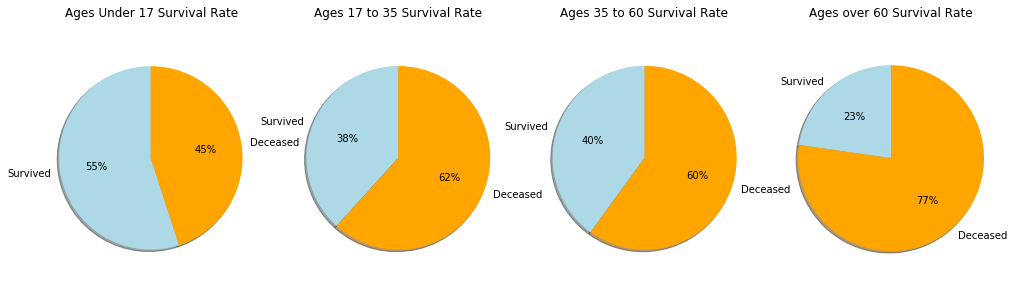

In [30]:
NUM_OF_AGE_GROUPS = 4
ages = titanic_df['Age']
age_groups = survival_rates = pd.Series([None]*NUM_OF_AGE_GROUPS)

age_groups[0] = titanic_df[ages<17]
age_groups[1] = titanic_df[(ages>=17) & (ages<=35)]
age_groups[2] = titanic_df[(ages>35) & (ages<=60)]
age_groups[3] = titanic_df[ages>60]

for i in range(NUM_OF_AGE_GROUPS):
    survived_col = age_groups[i]['Survived']
    survivors = age_groups[i][survived_col==True]
    survival_rates[i] = len(survivors) / len(survived_col)
    
headers = ['Ages Under 17','Ages 17 to 35','Ages 35 to 60','Ages over 60']
headers = [p+s for p in headers]
draw_pie_charts(survival_rates, headers)

Missing values for age groups were discarded when doing the above analysis.

The fact that children had the highest survival rate gives even more weight to our hypothesis that women and children were favored during the evacuation process.

While these findings are interesting, further rigorous statistical testing is required to draw any firm conclusions. For example, we still don't know how this sample was chosen from among the population of people aboard the Titanic. Any intentional or unintentional bias in selecting the sample would make our results more inaccurate.